# Set up 

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result
from model.PlotManager import PlotManager

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9) #m3
Iyy = 6610.17475482 * 10 ** (-6) #kgm2
hull_surface_area = .0383 #m2
hull_frontal_area = 0.0088
hull_cd = 1.2
hull_corr_factor = 0.75
hull_chord = .215

r_xi = -111.76 * 10 ** (-3) #m 
r_zi = 0.722 * 10 ** (-3) #m

r_xh = 0
r_zh = 0

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10**(-3)
r_zt = -75 * 10**(-3)

# Aero foil parameters
ctrl_AR = 2.61 #aspect ratio
ctrl_area = 0.025 #planform area
ctrl_stall_threshold = 10 #Angle of attack stall threshold
ctrl_Cl_a = 0.1/np.deg2rad(1)
ctrl_Cl_alpha_offset = 0.5
ctrl_chord = 0.1

#Towing parameters
tow_magnitude = 10 #N gets overritten by equilibrium optimization
drone_height = 3 #m above water
drone_tow_length = 5 #m 
probe_depth = 0.3

## Initialize the models

In [3]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]), tow_magnitude, drone_height, drone_tow_length, probe_depth)
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5), ctrl_AR, ctrl_area, ctrl_chord, ctrl_stall_threshold, ctrl_Cl_a, ctrl_Cl_alpha_offset)
hullForce = HullForce(np.array([r_xh,r_zh]), hull_surface_area, hull_frontal_area, hull_chord, hull_cd, hull_corr_factor)

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])

plot = PlotManager()

# Solve Equilibrium Point

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -2.00           degrees   
Delta_t         25.00           degrees   
Towing Force    41.16           N         
Delta_i         -20.00          degrees   
----------------------
Inertial Vel X: 0.00           m/s       
Inertial Vel Z: 0.00           m/s       
Pitch Rate:     0.10           rad/s     
Inertial Acc X: 33.67          m/s       
Inertial Acc Z: 1.77           m/s       
Pitch Acc:      4.77           rad/s     
Residual Norm: 579.756307
Optimization successful!


Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -2.00           degrees   
Delta_t         60.00           degrees   
Towing Force    20.37           N         
Delta_i         -20.00          degrees   
----------------------
Fx:             2.45           N         
Fz:             1.31           N         

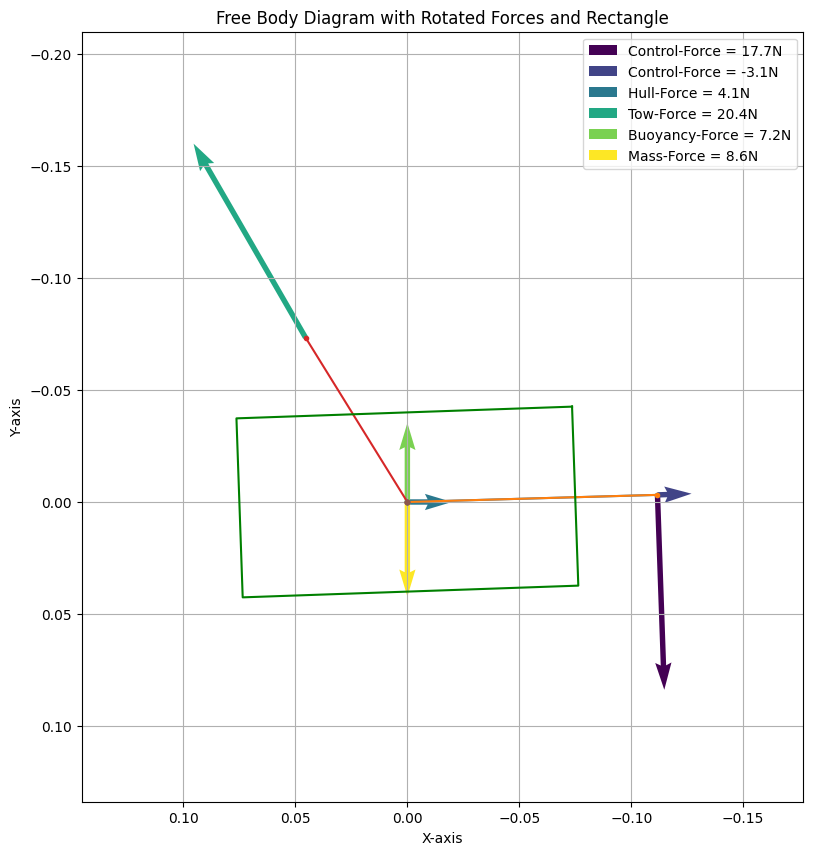

In [4]:
#Find equilibrium by minimizing Forces and moment individually using least squares
Velocity = 1 #m/s in inertial frame
results_LS, _ = sim.solve_equilibrium_state_LS_Vel(Velocity,1)
print("")
print("")

#print("Old Method:")
results_LS,_ = sim.solve_equilibrium_state_LS(Velocity,1)


initial_state = np.zeros(9)
initial_state[2] = results_LS[0]
initial_state[3] = 2

#plotfbd(sim, sim.eq_sim)

plot.plotfbd(sim, sim.eq_sim)

# Equilibrium Simulation

alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is

../model/Force.py:99: RuntimeWarning: overflow encountered in double_scalars
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
../model/Force.py:108: RuntimeWarning: invalid value encountered in double_scalars
  drag_skin = 0.5 * rho * Cd_0 * self.surface_area * V ** 2
../model/Force.py:56: RuntimeWarning: overflow encountered in double_scalars
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
../model/Force.py:63: RuntimeWarning: invalid value encountered in double_scalars
  drag_skin = 0.5 * rho * Cd_skin * 2*self.Area * V ** 2


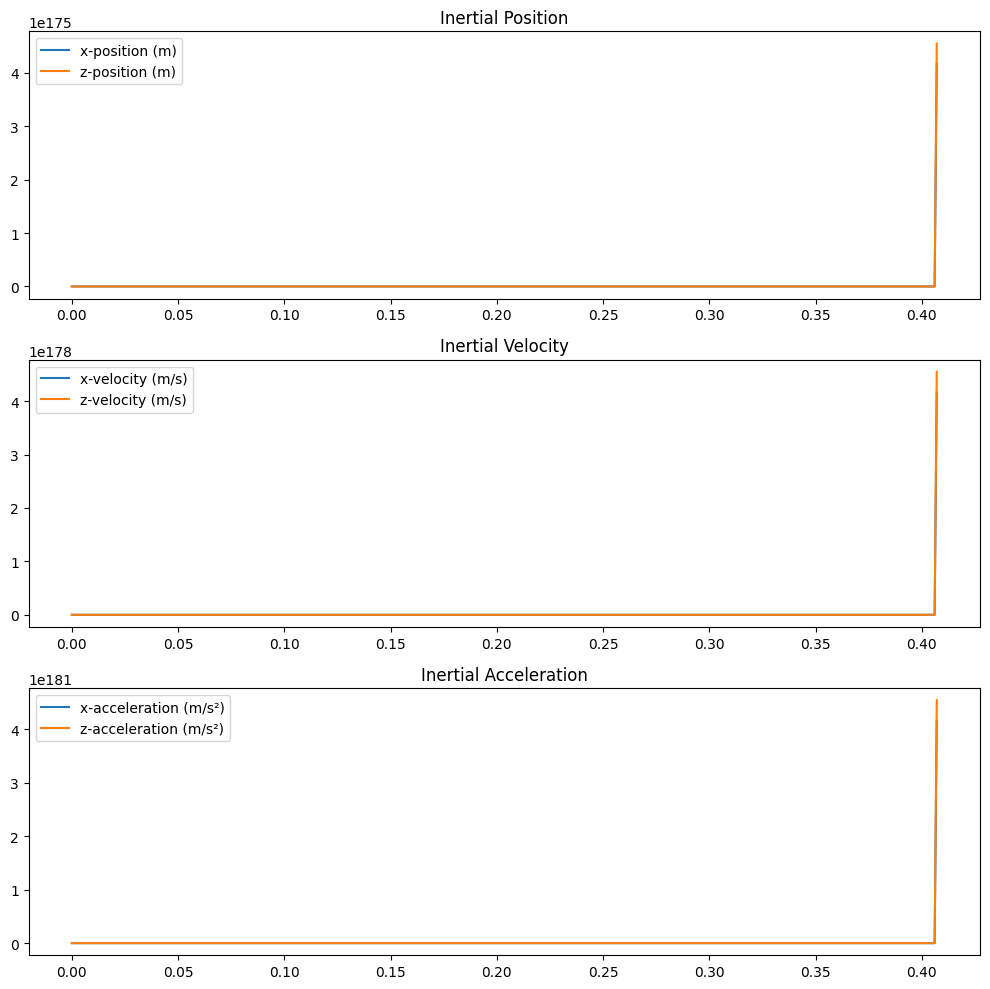

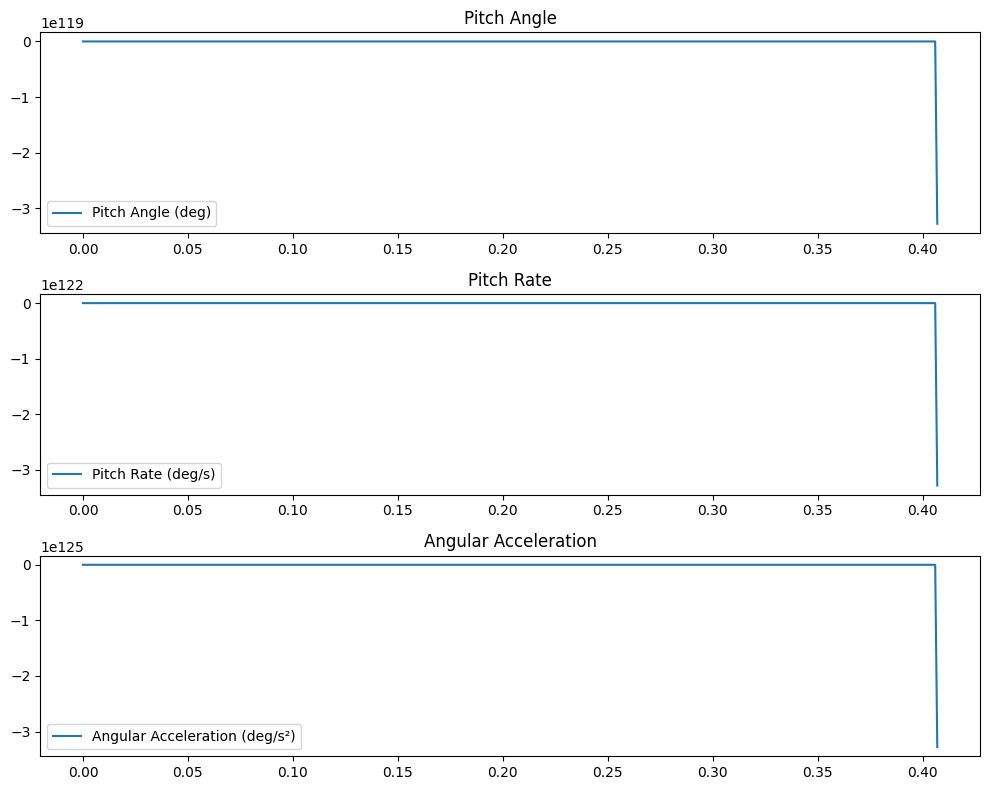

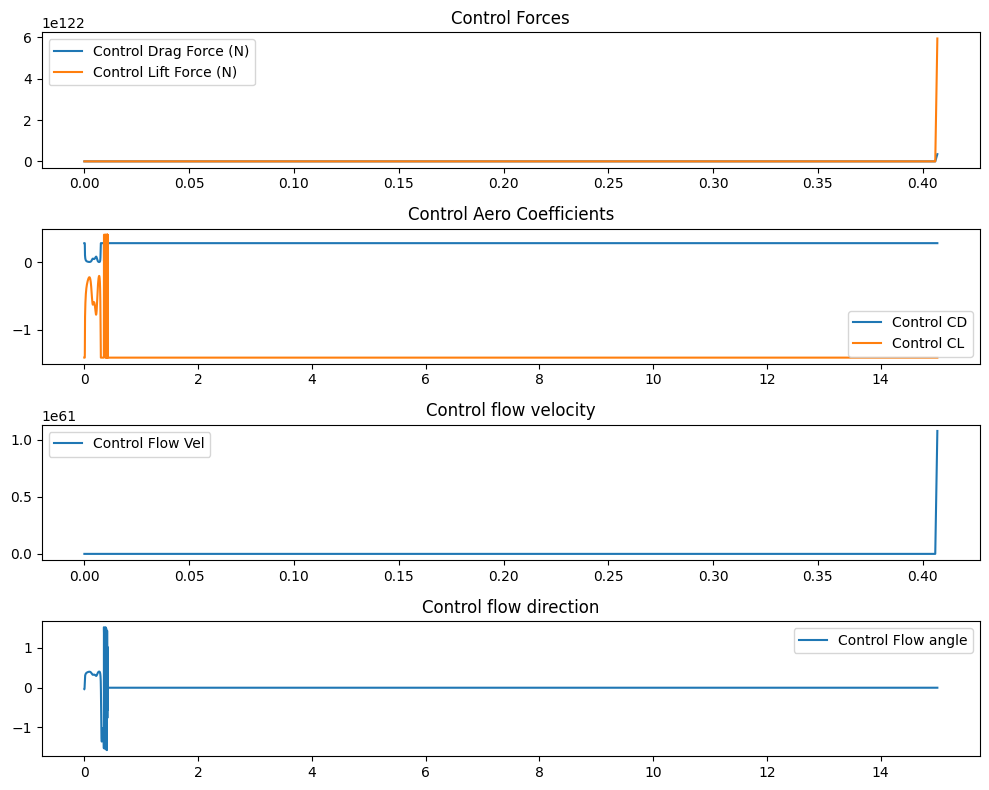

In [5]:
#print(initial_state)
euler_sim_results = sim.simulate_forward_euler(15000, 0.001, initial_state)
plot.plot_simulation_results(euler_sim_results)

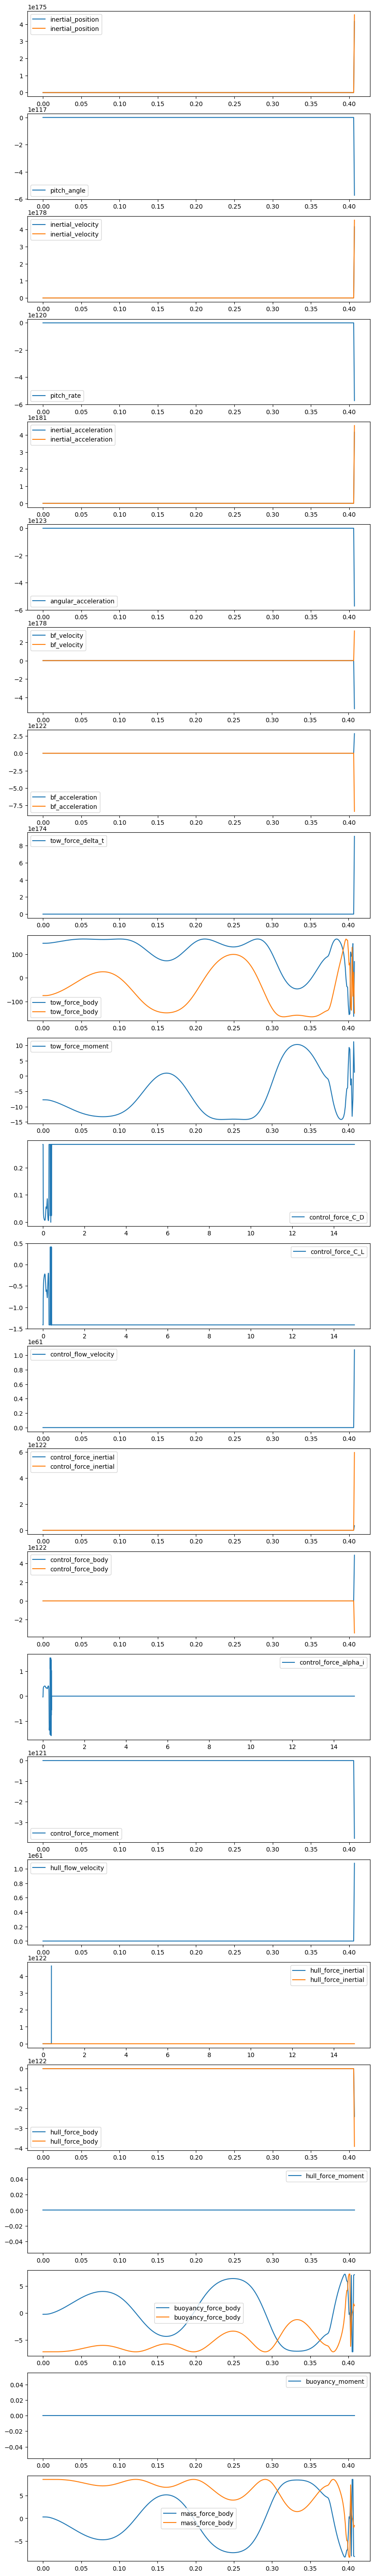

In [6]:
plot.plot_all_results(euler_sim_results)

# Perturbation Simulation

alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is bigger than 15degrees
alpha_i is

../model/Force.py:99: RuntimeWarning: overflow encountered in double_scalars
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
../model/Force.py:108: RuntimeWarning: invalid value encountered in double_scalars
  drag_skin = 0.5 * rho * Cd_0 * self.surface_area * V ** 2
../model/Force.py:56: RuntimeWarning: overflow encountered in double_scalars
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
../model/Force.py:63: RuntimeWarning: invalid value encountered in double_scalars
  drag_skin = 0.5 * rho * Cd_skin * 2*self.Area * V ** 2


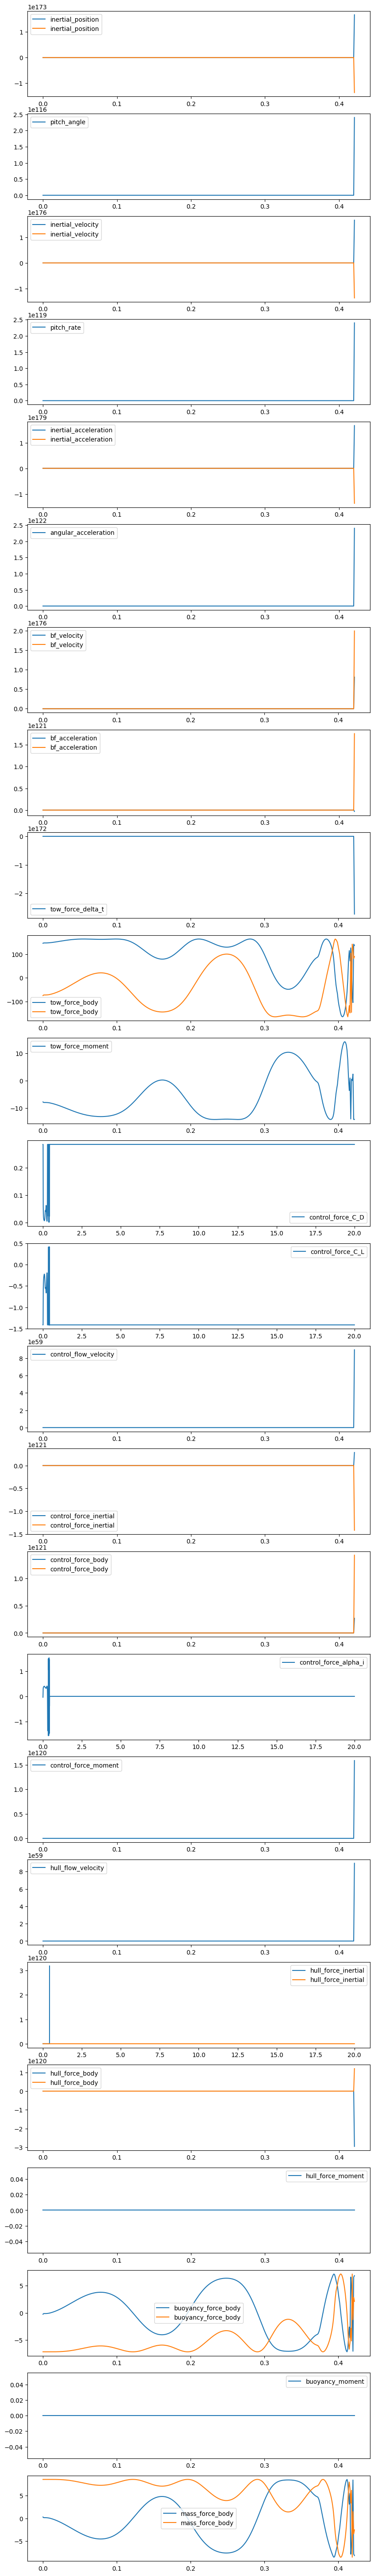

In [7]:
perturbed_state = [0, 0, 0.017, 0, 0 ,0] #Change Velocity

pertub_euler_sim_results = sim.simulate_forward_euler(20000, 0.001, initial_state, perturbed_state)
#plot.plot_simulation_results(euler_sim_results)
plot.plot_all_results(pertub_euler_sim_results)

# Jacobian & Eigenvalues

[ 0.00000000e+00  3.20377210e+04 -4.63986192e+03  1.18779795e+03
 -2.69575170e+00  9.99590968e-01]


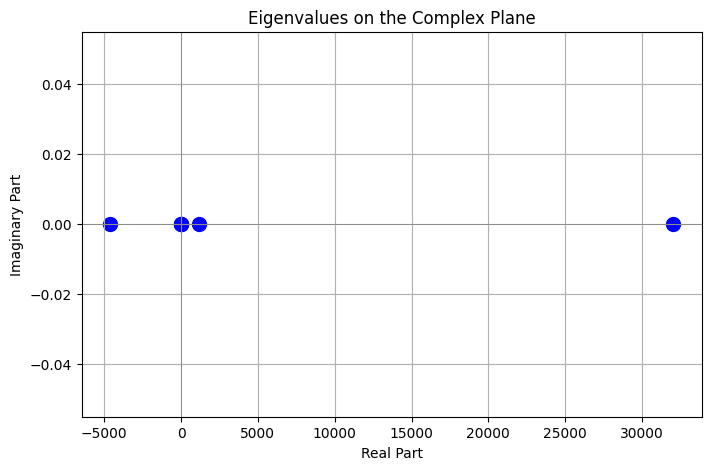

In [8]:
velocity = 2
pitch_angle = results_LS[0]
jacobian = sim.calculate_jacobian(velocity, pitch_angle, 1e-3)
eigs= np.linalg.eig(jacobian)
#print(jacobian)

# Sample list of complex eigenvalues
eigenvalues = eigs[0]
print(eigenvalues)

# Extract real and imaginary parts
real_parts = [z.real for z in eigenvalues]
imag_parts = [z.imag for z in eigenvalues]

# Plotting
plt.figure(figsize=(8,5))
plt.axhline(0, color='grey', lw=0.5)  # x-axis
plt.axvline(0, color='grey', lw=0.5)  # y-axis
plt.scatter(real_parts, imag_parts, color='blue', marker='o', s=100)

# Labels and title
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues on the Complex Plane")
plt.grid(True)
plt.show()

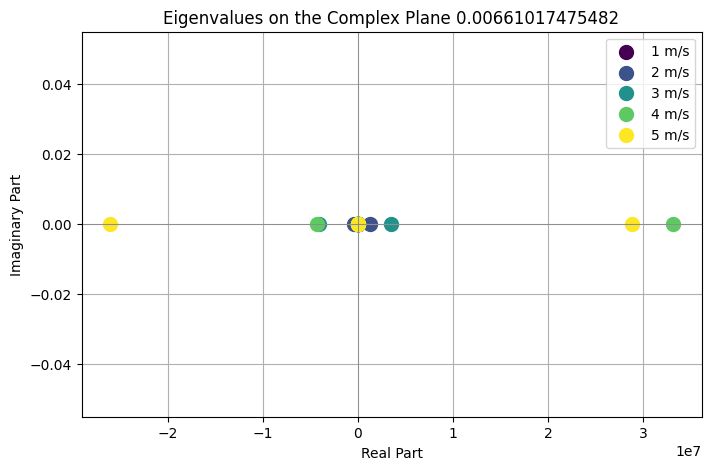

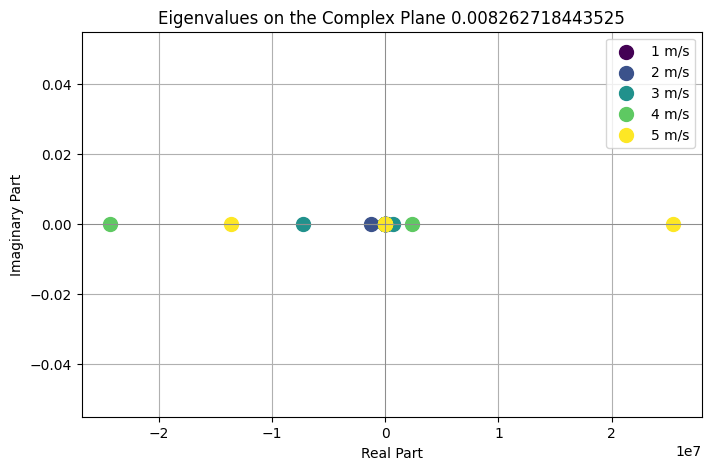

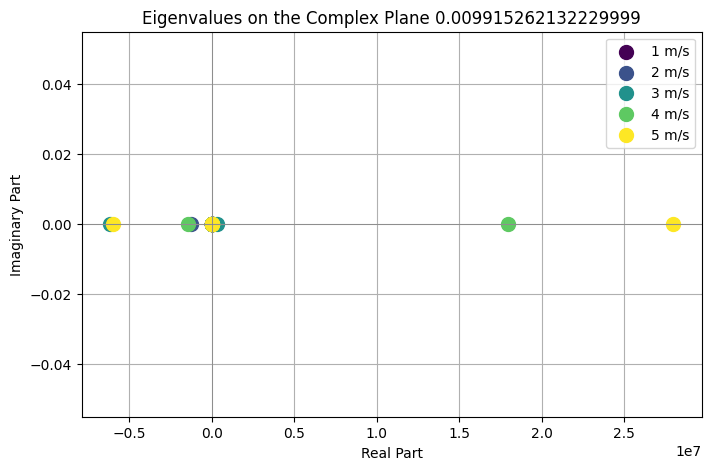

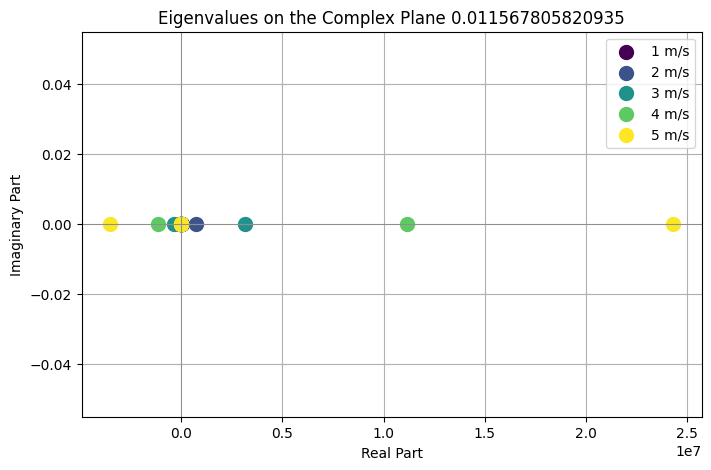

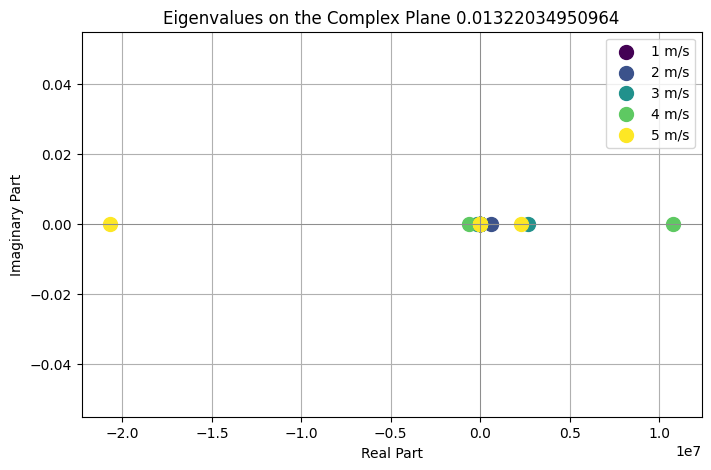

In [9]:
Iyy = 6610.17475482 * 10 ** (-6) #kgm2
Var = np.linspace(Iyy, Iyy*2,5)

for j in [0,1,2,3,4]:
    sim.rigidbody.Iyy = Var[j]
    v = [1,2,3,4,5]
    eigenvalues = []
    cmap = plt.cm.viridis
    colors = cmap(np.linspace(0,1,len(v)))
    plt.figure(figsize=(8,5))
    for i in [0,1,2,3,4]:
        results_LS, _ = sim.solve_equilibrium_state_LS(2)
        pitch_angle = results_LS[0]
        velocity = v[i]
        jacobian = sim.calculate_jacobian(velocity, pitch_angle, 1e-3)
        eigs= np.linalg.eig(jacobian)
        #print(jacobian)

        # Sample list of complex eigenvalues
        eigenvalues = eigs[0]

        # Extract real and imaginary parts
        real_parts = [z.real for z in eigenvalues]
        imag_parts = [z.imag for z in eigenvalues]

        # Plotting
        #
        
        plt.scatter(real_parts, imag_parts, color=colors[i] , marker='o', s=100, label=str(v[i])+" m/s")

    # Labels and title
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title("Eigenvalues on the Complex Plane " + str(Var[j]))
    plt.axhline(0, color='grey', lw=0.5)  # x-axis
    plt.axvline(0, color='grey', lw=0.5)  # y-axis
    plt.legend()
    plt.grid(True)
    plt.show()
